# Make bank configs for simulations

In [ ]:
<agent identifier="SBSA">
<parameter type="state_variables" name="equity" value="86200249000.0"></parameter>
 <parameter type="parameters" name="leverage" value="13.0780116888061"></parameter>
 <parameter type="state_variables" name="debt" value="1127327864000.0"></parameter>
 <parameter type="parameters" name="m_1" value="0.0245212259042243" label="Cash and gold reserves "></parameter>
 <parameter type="parameters" name="m_2" value="0.0107197211672673" label="SA Interbank deposits, loans and advances "></parameter>
 <parameter type="parameters" name="m_3" value="0.00405856934605684" label="Rand Deposits with and loans to foreign banks"></parameter>
 <parameter type="parameters" name="m_4" value="0.0359414516505725" label="Loans granted under repo agreement"></parameter>
 <parameter type="parameters" name="m_5" value="0.129182760844701" label="Foreign currency loans and advances d 134),"></parameter>
 <parameter type="parameters" name="m_6" value="0.0170625845237423" label="Redeemable preference shares"></parameter>
 <parameter type="parameters" name="m_7" value="0.0296141684852751" label="corporate instalment credit "></parameter>
 <parameter type="parameters" name="m_8" value="0.0252157207337808" label="household instalment credit "></parameter>
 <parameter type="parameters" name="m_9" value="0.0690936667241429" label="corporate mortgage"></parameter>
 <parameter type="parameters" name="m_10" value="0.217515842585181" label="household mortgage"></parameter>
 <parameter type="parameters" name="m_11" value="0.114607784121438" label="Unsecured lending corporate"></parameter>
 <parameter type="parameters" name="m_12" value="0.0247813962262941" label="Unsecured lending households"></parameter>
 <parameter type="parameters" name="m_13" value="0.0589651490010434" label="Other credit (credit card + leasing + Overdarft + factoring debt)"></parameter>
 <parameter type="parameters" name="m_14" value="0.0412585423144622" label="Central and provincial government bonds"></parameter>
 <parameter type="parameters" name="m_15" value="0.00466172471770335" label="Other public-sector bonds"></parameter>
 <parameter type="parameters" name="m_16" value="0.0123382885320927" label="Private sector bonds"></parameter>
 <parameter type="parameters" name="m_17" value="0.000201706905161743" label="Equity holdings in subsidiaries and joint ventures"></parameter>
 <parameter type="parameters" name="m_18" value="0.0129940574355693" label="Listed and unlisted equities"></parameter>
 <parameter type="parameters" name="m_19" value="0.0839139051737815" label="Securitisation/ asset-backed securities"></parameter>
 <parameter type="parameters" name="m_20" value="0.00454473608062181" label="Derivative instruments"></parameter>
 <parameter type="parameters" name="m_21" value="0.0408429870466462" label="Treasury bills, SA Reserve Bank bills,  Land Bank bills "></parameter>
 <parameter type="parameters" name="m_22" value="0.00209378503289771" label="Other investments"></parameter>
 <parameter type="parameters" name="m_23" value="0.0358702254473441" label="Non financial assets"></parameter>
</agent>


# Make overview table 

In [1]:
pwd

'/Users/admin/git_repos/ba900/processing'

In [16]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
file_list=[]

import os
os.chdir('/Users/admin/git_repos/ba900/')

for filename in os.listdir('./data/output/'):
    if filename.endswith(".pkl"):
        unpickle = './data/output/'+str(filename)
        print(unpickle)
        file_list.append(pd.read_pickle(unpickle))
 
 
MASTER = pd.concat(file_list)
MASTER['time'] = pd.to_datetime(MASTER['time'])
MASTER['Value'] = pd.to_numeric(MASTER['Value'])


./data/output/df2013.pkl
./data/output/df2012.pkl
./data/output/df2010.pkl
./data/output/df2011.pkl
./data/output/df2015.pkl
./data/output/df2014.pkl
./data/output/df2016.pkl
./data/output/df2017.pkl
./data/output/df2019.pkl
./data/output/df2018.pkl
./data/output/df2008.pkl
./data/output/df2020.pkl
./data/output/df2009.pkl


In [17]:
import sys
import os
import sys
sys.path.append("..") 
 
from ba900 import assets_to_weights   

transform=assets_to_weights.tranformer()

from_=['ABSA BANK LTD ','THE STANDARD BANK OF S A LTD','FIRSTRAND BANK LIMITED ','NEDBANK LTD ','INVESTEC BANK LTD ',\
      'CITIBANK N.A ','CAPITEC BANK ' , 'AFRICAN BANK LIMITED ','JPMORGAN CHASE BANK             ',\
       'THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH ','STANDARD CHARTERED BANK ',\
       'CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH '
      ]
to_=['ABSA', 'STANDARDBANK', 'FNB','NEDBANK', 'INVESTEC',\
    'CITYBANK','CAPITEC','AfricanB','JPM',\
     'HSBC','CHARTERED','ChinaConstruction']
renamed=transform.relabel_banknames(from_,to_,MASTER)
t=transform.get_biggest_banks( "2015", "12", renamed, 10)

top10=t.values.tolist()
renamed=renamed[renamed.InstitutionDescription.isin(top10)]
years =['2010','2011','2012','2013', '2014','2015','2016','2017','2018']

months=["{:02d}".format(i) for i in range(1,13)]
df=transform.get_overview_timeseries(top10,months,years,renamed)
 


changed ABSA BANK LTD  to: ABSA
changed THE STANDARD BANK OF S A LTD to: STANDARDBANK
changed FIRSTRAND BANK LIMITED  to: FNB
changed NEDBANK LTD  to: NEDBANK
changed INVESTEC BANK LTD  to: INVESTEC
changed CITIBANK N.A  to: CITYBANK
changed CAPITEC BANK  to: CAPITEC
changed AFRICAN BANK LIMITED  to: AfricanB
changed JPMORGAN CHASE BANK              to: JPM
changed THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH  to: HSBC
changed STANDARD CHARTERED BANK  to: CHARTERED
changed CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH  to: ChinaConstruction


/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Value'] = pd.to_numeric(a['Value'])
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [18]:
df.to_csv('overview_top10.csv')

name
ABSA             AxesSubplot(0.125,0.2;0.775x0.68)
AfricanB         AxesSubplot(0.125,0.2;0.775x0.68)
CAPITEC          AxesSubplot(0.125,0.2;0.775x0.68)
CHARTERED        AxesSubplot(0.125,0.2;0.775x0.68)
CITYBANK         AxesSubplot(0.125,0.2;0.775x0.68)
FNB              AxesSubplot(0.125,0.2;0.775x0.68)
HSBC             AxesSubplot(0.125,0.2;0.775x0.68)
INVESTEC         AxesSubplot(0.125,0.2;0.775x0.68)
NEDBANK          AxesSubplot(0.125,0.2;0.775x0.68)
STANDARDBANK     AxesSubplot(0.125,0.2;0.775x0.68)
Name: leverage, dtype: object

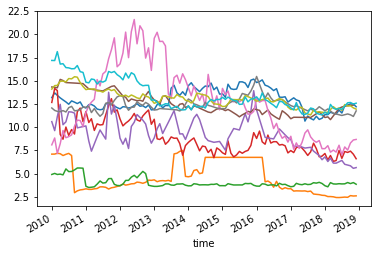

In [19]:
# df.groupby('name')['leverage'] 
grpA= df.groupby('name')
(grpA['leverage'].plot())

In [29]:
print(round(df4.iloc[0:1,-29:].sum(axis=1).values[0]))

1


In [17]:
renamed[renamed.InstitutionDescription=='FNB']

,ColumnCode,ColumnDescription,ItemDescription,ItemNumber,Value,TableNumber,Type,Description,TheYear,TheMonth,TheDay,InstitutionCode,InstitutionDescription,LastModified,time
0,1,Chequej,DEPOSITS (total of items 2 and 32),1,1.648665e+08,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
1,2,Savings,DEPOSITS (total of items 2 and 32),1,6.889990e+06,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
2,3,Up to 1 day,DEPOSITS (total of items 2 and 32),1,1.772972e+08,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
3,4,More than 1 day to 1 month,DEPOSITS (total of items 2 and 32),1,7.181958e+07,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
4,5,More than 1 month to 6 months,DEPOSITS (total of items 2 and 32),1,9.803116e+07,1,BA900,BA900 Forms,2015,04,30,416053,FNB,20160914,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,2,Of which: on-lentb,Other securities (total of items 383 to 384),382,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01
12,1,Total lent to other parties,Domestic sector (SA residents),383,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01
13,2,Of which: on-lentb,Domestic sector (SA residents),383,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01
14,1,Total lent to other parties,Foreign sector (non-residents),384,0.000000e+00,19,BA900,BA900 Forms,2015,08,31,416053,FNB,20160311,2015-08-01


In [ ]:
 # id	Name	Equity	Leverage	Debt	m1 Cash and gold reserves 
#  A 	SBSA	 86 200 249 000 	13.1	1127327864000	2.5%
#  C 	FNB	 75 526 054 370 	12.0	904393561840	2.7%
#  B 	ABSA	 57 255 883 000 	15.2	869270227000	2.8%
#  D 	NEDBANK	 57 683 474 000 	13.0	751035802000	2.9%
#  E 	INVESTEC	 24 265 229 000 	14.5	352780580000	1.9%
#  F 	CITYBANK	 5 123 291 030 	13.9	71388112090	0.8%
#  G 	CAPITEC	 13 056 412 000 	3.7	48913724000	5.8%
#  H 	AfricanB	 7 466 274 000 	6.8	50419037000	2.2%
#  I 	JPM	 3 246 873 000 	16.6	53788923000	0.3%
#  J 	HSBC	 3 919 312 000 	11.7	45886507000	1.9%
#  K 	CHARTERED	 3 688 896 000 	9.4	34731129000	1.7%
#  L 	BoCHINA	 4 178 651 000 	7.5	31464510000	1.1%
#  M 	DeutscheB	 1 433 355 000 	14.9	21321901000	0.1%
#  N 	BNP	 636 568 000 	21.8	13862348000	0.3%
#  O 	SOCIETEG	 666 836 000 	16.6	11058957000	1.3%

/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/ba900/assets_to_weights.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [33]:
df3

,id,name,equity,year,month,debt,leverage,total_assets,time,m1_South_African_bank_notes_and_subsidiary_coin,...,m20_Central_and_provincial_government_bonds,m21_Other_public_sector_bonds,m22_Private_sector_bonds,m23_Equity_holdings_in_subsidiaries_and_joint_ventures,m24_Listed_and_unlisted_equities,m25_Securitisation/ asset-backed_securities,m26_Derivative_instruments,m27_Treasury_bills_SA_Reserve_Bank_bills_Land_Bank_bills,m28_Other_investments_less_impairments,m29_Non_financial_assets
time,,,,,,,,,,,,,,,,,,,,,
2015-11-01,A,ABSA,5.729744e+10,2015,11,8.635550e+11,15.071442,9.208524e+11,2015-11-01,0.007468,...,0.080122,0.002978,0.006269,0.000501,0.002535,0.0,0.058537,0.0,0.011987,0.053888


In [45]:
debt/equity

16.717632831297976

changed ABSA BANK LTD  to: ABSA
changed THE STANDARD BANK OF S A LTD to: STANDARDBANK


array(['SASFIN BANK LTD ', 'BIDVEST BANK LIMITED ', 'IMPERIAL BANK LTD ',
       'MEEG BANK LIMITED ', 'STATE BANK OF INDIA ', 'NEDBANK LTD ',
       'ALBARAKA BANK LTD ', 'ABSA', 'COMMERZBANK AKTIENGESELLSCHAFT ',
       'GBS MUTUAL BANK ', 'BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
       'INVESTEC BANK LTD ', 'HABIB OVERSEAS BANK LTD ',
       'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'AFRICAN BANK LIMITED ',
       'JPMORGAN CHASE BANK             ', 'GRINDROD BANK LTD ',
       'CITIBANK N.A ', 'CAPITEC BANK ', 'VBS MUTUAL BANK ',
       'BANK OF CHINA LTD JHB BRANCH    ', 'ICICI BANK LIMITED ',
       'STANDARDBANK ', 'HBZ BANK LTD ',
       'CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH ',
       'THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH ',
       'MERCANTILE BANK LTD ', 'THE S A BANK OF ATHENS LTD ',
       'CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK ', 'CANARA BANK ',
       'UBANK LIMITED ', 'DEUTSCHE BANK AG ', 'BANK OF BAROD

In [47]:
absa_assets['InstitutionDescription'] = absa_assets['InstitutionDescription'].apply(lambda x: x.replace('ABSA BANK LTD ', 'ABSA'))


/Users/admin/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
absa_assets

,ColumnCode,ColumnDescription,ItemDescription,ItemNumber,Value,TableNumber,Type,Description,TheYear,TheMonth,TheDay,InstitutionCode,InstitutionDescription,LastModified,time
18,1,TOTAL,TOTAL EQUITY AND LIABILITIES (total of items 9...,102,720666310.0,5,BA900,BA900 Forms,2008,11,30,34118,ABSA,20130502,2008-11-01


In [46]:
# id	Name	Equity	Leverage	Debt	m1 Cash and gold reserves 
#  A 	SBSA	 86 200 249 000 	13.1	1127327864000	2.5%
#  C 	FNB	 75 526 054 370 	12.0	904393561840	2.7%
#  B 	ABSA	 57 255 883 000 	15.2	869270227000	2.8%
#  D 	NEDBANK	 57 683 474 000 	13.0	751035802000	2.9%
#  E 	INVESTEC	 24 265 229 000 	14.5	352780580000	1.9%
#  F 	CITYBANK	 5 123 291 030 	13.9	71388112090	0.8%
#  G 	CAPITEC	 13 056 412 000 	3.7	48913724000	5.8%
#  H 	AfricanB	 7 466 274 000 	6.8	50419037000	2.2%
#  I 	JPM	 3 246 873 000 	16.6	53788923000	0.3%
#  J 	HSBC	 3 919 312 000 	11.7	45886507000	1.9%
#  K 	CHARTERED	 3 688 896 000 	9.4	34731129000	1.7%
#  L 	BoCHINA	 4 178 651 000 	7.5	31464510000	1.1%
#  M 	DeutscheB	 1 433 355 000 	14.9	21321901000	0.1%
#  N 	BNP	 636 568 000 	21.8	13862348000	0.3%
#  O 	SOCIETEG	 666 836 000 	16.6	11058957000	1.3%

0.05981708116760684

In [ ]:
THE STANDARD BANK OF S A LTD 
14                              FIRSTRAND BANK LIMITED 
14                                       ABSA BANK LTD 
14                                         NEDBANK LTD 
14                                   INVESTEC BANK LTD 
14                                        CAPITEC BANK 
14    THE HONGKONG AND SHANGHAI BANKING CORPORATION ...
14                                        CITIBANK N.A 
14                             STANDARD CHARTERED BANK 
14    CHINA CONSTRUCTION BANK         CORPORATION - ...

In [35]:
absa_equity.Value.values[0]+absa_debt.Value.values[0]

468143972.0

In [40]:
absa_equity=MASTER[(MASTER['TheYear']=='2008')&(MASTER['TheMonth']=='11')&
              (MASTER['InstitutionDescription']=='ABSA BANK LTD ')&(MASTER['ItemNumber']=='95')]
absa_equity

,ColumnCode,ColumnDescription,ItemDescription,ItemNumber,Value,TableNumber,Type,Description,TheYear,TheMonth,TheDay,InstitutionCode,InstitutionDescription,LastModified,time
140,1,Short-term,TOTAL LIABILITIES (total of items 78 to 80),95,427468882.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
141,2,Medium-term,TOTAL LIABILITIES (total of items 78 to 80),95,118644799.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
142,3,Long-term,TOTAL LIABILITIES (total of items 78 to 80),95,133877539.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
143,4,TOTAL,TOTAL LIABILITIES (total of items 78 to 80),95,679991220.0,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
144,5,Of which : in foreign currency,TOTAL LIABILITIES (total of items 78 to 80),95,NaN,4,BA900,BA900 Forms,2008,11,30,34118,ABSA BANK LTD,20130502,2008-11-01
